# Extract all text from PDF into Markdown Format

Below is an example of using AnyParser asynchronous API to accurately extract the layout and text from a sample PDF into markdown format. 

To load the preview for the PDF document used in this demo, install the Poppler PDF rendering library:
- Mac:
```bash
brew install poppler
```
- Linux:
```bash
sudo apt update
sudo apt install poppler-utils
```
- Windows:
```bash
choco install poppler
```

### 1. Load the libraries

To install the packages, uncomment the commands below.

In [1]:
# !pip3 install python-dotenv
# !pip3 install PyPDF2 pdfplumber pdf2image

Next, to use AnyParser, either install the public package or clone the SDK locally.

In [2]:
# Option 1: install public package
# !pip3 install --upgrade any-parser

# Option 2: if you have sdk respository installed locally, add system path
# import sys
# sys.path.append(".")
# sys.path.append("..")
# sys.path.append("../..")

After performing Option 1 or 2 above, import the libraries.

In [2]:
import os
import logging
import warnings
from dotenv import load_dotenv
from pdf2image import convert_from_path
from IPython.display import display, Markdown
from any_parser import AnyParser

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set logging level to ERROR to suppress most log messages
logging.getLogger().setLevel(logging.ERROR)

### 2. Set up your AnyParser API key

To set up your `CAMBIO_API_KEY` API key, you will:

1. create a `.env` file in your root folder;
2. add the following one line to your `.env file:
    ```
    CAMBIO_API_KEY=17b************************
    ```

Then run the below line to load your API key.

In [3]:
load_dotenv(override=True)
example_apikey = os.getenv("CAMBIO_API_KEY")

### 3. Load the test sample data

Now let's load a sample data to test AnyParser's capabilities. AnyParser supports both image and PDF. 

Let's visualize [the sample PDF](https://www.stoxx.com/document/Indices/Common/Indexguide/stoxx_index_guide.pdf) first!

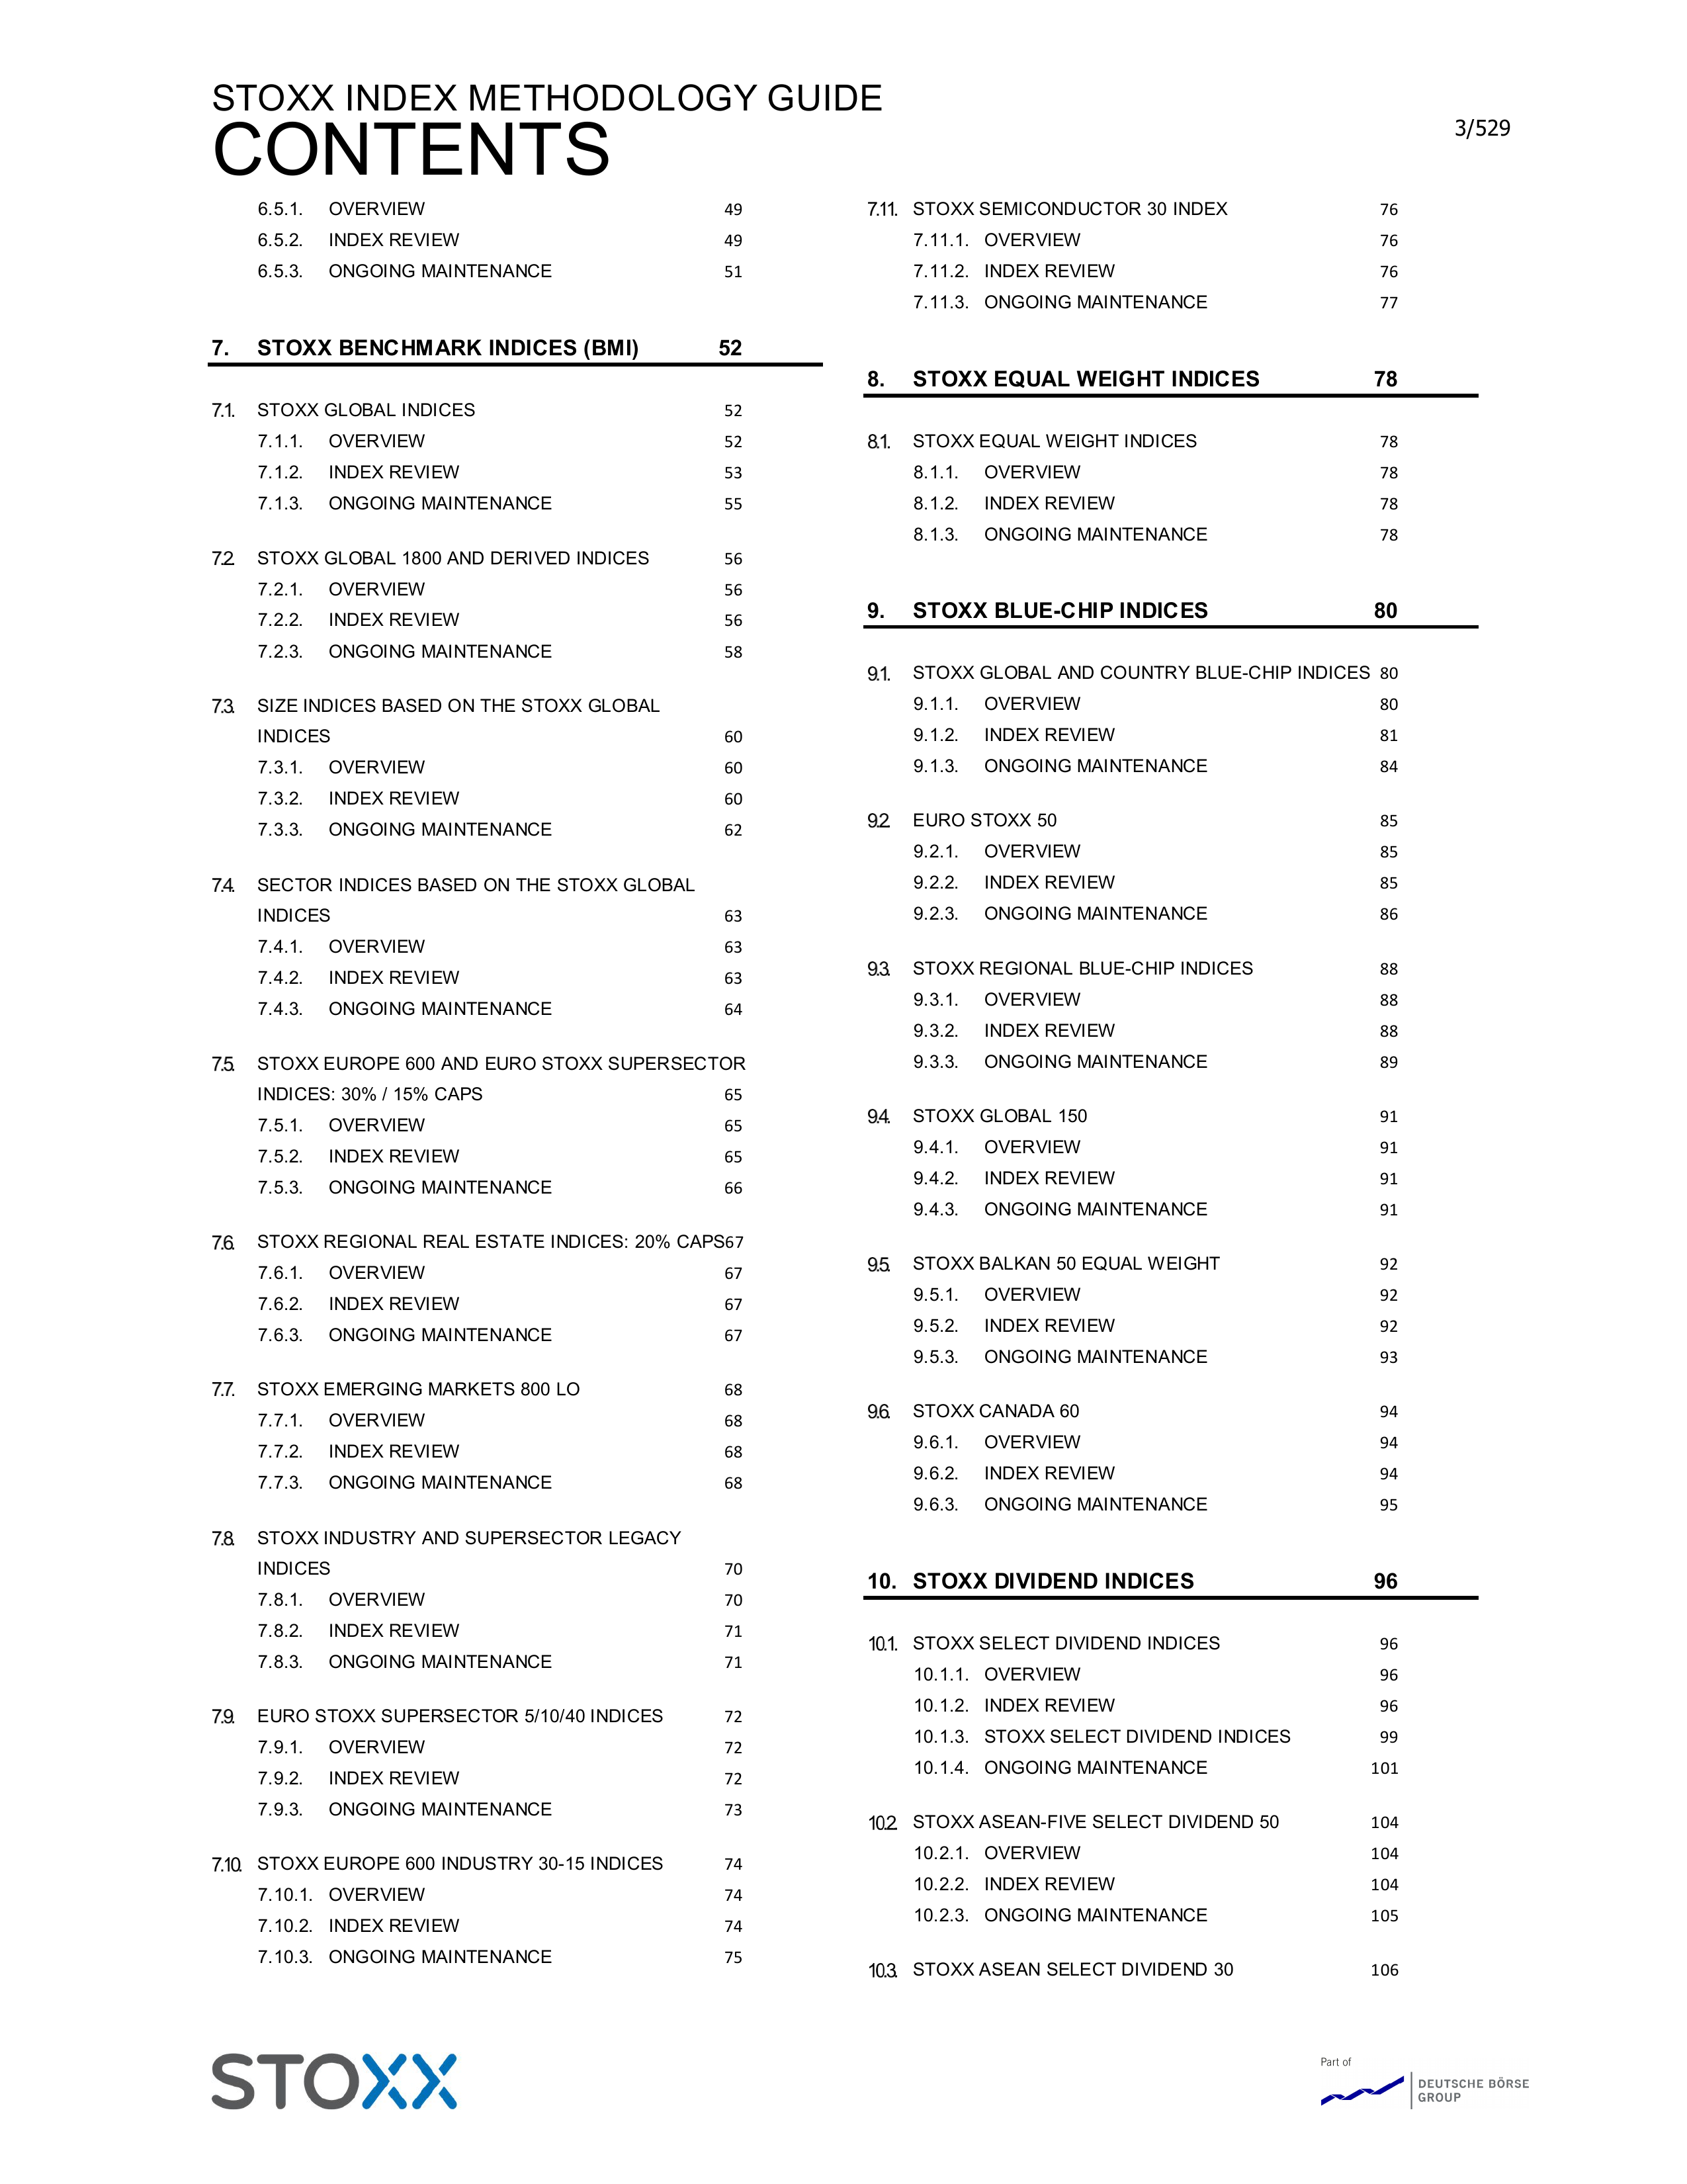

In [4]:
example_local_file = "./sample_data/stoxx_index_guide_0003.pdf"

# Convert PDF to a list of images
pages = convert_from_path(example_local_file, 300)  # 300 is the DPI

# Display the first page
display(pages[0])

### 4. Run AnyParser and Visualize the Markdown Output

We will run AnyParser on our sample data and then display it in the Markdown format. The extract may take 1-20 seconds per page. Note that this example uses the Asynchronous API. To see how AnyParser can be used synchronously, see the [Synchronous API notebook](./pdf_to_json.ipynb).

In [5]:
ap = AnyParser(example_apikey)

# start the extraction request
file_id = ap.async_parse(example_local_file)
print("Got file id:", file_id)

# fetch results (5s polling up to 60s)
markdown_string = ap.async_fetch(file_id, sync=True, sync_timeout=60, sync_interval=5)
display(Markdown(markdown_string))

Got file id: 2f9685f3-71f4-46a5-a3a1-46479fe9b17675b49a0831e720451c29ca573ad6c5d41a1c621b981fdf69da6fc701d7282e45
Waiting for response...
Waiting for response...
Waiting for response...


STOXX INDEX METHODOLOGY GUIDE CONTENTS

3/529

## 7. STOXX BENCHMARK INDICES (BMI)

| 7.1. STOXX GLOBAL INDICES | 52 |
|---------------------------|-----|
| 7.1.1. OVERVIEW | 52 |
| 7.1.2. INDEX REVIEW | 53 |
| 7.1.3. ONGOING MAINTENANCE | 55 |

| 7.2 STOXX GLOBAL 1800 AND DERIVED INDICES | 56 |
|-------------------------------------------|-----|
| 7.2.1. OVERVIEW | 56 |
| 7.2.2. INDEX REVIEW | 56 |
| 7.2.3. ONGOING MAINTENANCE | 58 |

| 7.3 SIZE INDICES BASED ON THE STOXX GLOBAL INDICES | 60 |
|---------------------------------------------------|-----|
| 7.3.1. OVERVIEW | 60 |
| 7.3.2. INDEX REVIEW | 60 |
| 7.3.3. ONGOING MAINTENANCE | 62 |

| 7.4 SECTOR INDICES BASED ON THE STOXX GLOBAL INDICES | 63 |
|-----------------------------------------------------|-----|
| 7.4.1. OVERVIEW | 63 |
| 7.4.2. INDEX REVIEW | 63 |
| 7.4.3. ONGOING MAINTENANCE | 64 |

| 7.5 STOXX EUROPE 600 AND EURO STOXX SUPERSECTOR INDICES: 30% / 15% CAPS | 65 |
|------------------------------------------------------------------------|-----|
| 7.5.1. OVERVIEW | 65 |
| 7.5.2. INDEX REVIEW | 65 |
| 7.5.3. ONGOING MAINTENANCE | 66 |

| 7.6 STOXX REGIONAL REAL ESTATE INDICES: 20% CAPS67 | 67 |
|-----------------------------------------------------|-----|
| 7.6.1. OVERVIEW | 67 |
| 7.6.2. INDEX REVIEW | 67 |
| 7.6.3. ONGOING MAINTENANCE | 67 |

| 7.7 STOXX EMERGING MARKETS 800 LO | 68 |
|-------------------------------------|-----|
| 7.7.1. OVERVIEW | 68 |
| 7.7.2. INDEX REVIEW | 68 |
| 7.7.3. ONGOING MAINTENANCE | 68 |

| 7.8 STOXX INDUSTRY AND SUPERSECTOR LEGACY INDICES | 70 |
|---------------------------------------------------|-----|
| 7.8.1. OVERVIEW | 70 |
| 7.8.2. INDEX REVIEW | 71 |
| 7.8.3. ONGOING MAINTENANCE | 71 |

| 7.9 EURO STOXX SUPERSECTOR 5/10/40 INDICES | 72 |
|---------------------------------------------|-----|
| 7.9.1. OVERVIEW | 72 |
| 7.9.2. INDEX REVIEW | 72 |
| 7.9.3. ONGOING MAINTENANCE | 73 |

| 7.10 STOXX EUROPE 600 INDUSTRY 30-15 INDICES | 74 |
|----------------------------------------------|-----|
| 7.10.1. OVERVIEW | 74 |
| 7.10.2. INDEX REVIEW | 74 |
| 7.10.3. ONGOING MAINTENANCE | 75 |

| 7.11. STOXX SEMICONDUCTOR 30 INDEX | 76 |
|-------------------------------------|-----|
| 7.11.1. OVERVIEW | 76 |
| 7.11.2. INDEX REVIEW | 76 |
| 7.11.3. ONGOING MAINTENANCE | 77 |

## 8. STOXX EQUAL WEIGHT INDICES

| 8.1. STOXX EQUAL WEIGHT INDICES | 78 |
|--------------------------------|-----|
| 8.1.1. OVERVIEW | 78 |
| 8.1.2. INDEX REVIEW | 78 |
| 8.1.3. ONGOING MAINTENANCE | 78 |

## 9. STOXX BLUE-CHIP INDICES

| 9.1 STOXX GLOBAL AND COUNTRY BLUE-CHIP INDICES | 80 |
|------------------------------------------------|-----|
| 9.1.1. OVERVIEW | 80 |
| 9.1.2. INDEX REVIEW | 81 |
| 9.1.3. ONGOING MAINTENANCE | 84 |

| 9.2 EURO STOXX 50 | 85 |
|-------------------|-----|
| 9.2.1. OVERVIEW | 85 |
| 9.2.2. INDEX REVIEW | 85 |
| 9.2.3. ONGOING MAINTENANCE | 86 |

| 9.3 STOXX REGIONAL BLUE-CHIP INDICES | 88 |
|-------------------------------------|-----|
| 9.3.1. OVERVIEW | 88 |
| 9.3.2. INDEX REVIEW | 88 |
| 9.3.3. ONGOING MAINTENANCE | 89 |

| 9.4 STOXX GLOBAL 150 | 91 |
|----------------------|-----|
| 9.4.1. OVERVIEW | 91 |
| 9.4.2. INDEX REVIEW | 91 |
| 9.4.3. ONGOING MAINTENANCE | 91 |

| 9.5 STOXX BALKAN 50 EQUAL WEIGHT | 92 |
|----------------------------------|-----|
| 9.5.1. OVERVIEW | 92 |
| 9.5.2. INDEX REVIEW | 92 |
| 9.5.3. ONGOING MAINTENANCE | 93 |

| 9.6 STOXX CANADA 60 | 94 |
|---------------------|-----|
| 9.6.1. OVERVIEW | 94 |
| 9.6.2. INDEX REVIEW | 94 |
| 9.6.3. ONGOING MAINTENANCE | 95 |

## 10. STOXX DIVIDEND INDICES

| 10.1 STOXX SELECT DIVIDEND INDICES | 96 |
|-----------------------------------|-----|
| 10.1.1. OVERVIEW | 96 |
| 10.1.2. INDEX REVIEW | 96 |
| 10.1.3. STOXX SELECT DIVIDEND INDICES | 99 |
| 10.1.4. ONGOING MAINTENANCE | 101 |

| 10.2 STOXX ASEAN-FIVE SELECT DIVIDEND 50 | 104 |
|---------------------------------------------|-----|
| 10.2.1. OVERVIEW | 104 |
| 10.2.2. INDEX REVIEW | 104 |
| 10.2.3. ONGOING MAINTENANCE | 105 |

| 10.3 STOXX ASEAN SELECT DIVIDEND 30 | 106 |
|-------------------------------------|-----|

STOXX logo with text "Part of DEUTSCHE BÖRSE GROUP"

## 5. Model Options
The `async_extract` function defaults to the `BASE` model. We also have the `PRO` model.
- `BASE`: Our base model is optimized for a balance between speed and accuracy.
- `PRO`: Our pro model is optimized for accuracy and is slightly slower than the `BASE` model.

### PRO Model Example
To use the `PRO` model, simply import the `ModelType` and pass the `model` parameter as shown below.

In [7]:
from any_parser import ModelType

# start the extraction request
file_id = ap.async_extract(example_local_file,  model=ModelType.PRO)
print("Got file id:", file_id)

# fetch results (5s polling up to 60s)
markdown_string = ap.async_fetch(file_id, sync=True, sync_timeout=60, sync_interval=5)
display(Markdown(markdown_string))

Got file id: e4617cdc-51a1-4fba-ba18-09f7b1d4cb2e0ab1dcb579a2d1bd241d7e22c734065bc0ce858bb720d9bf817d57aa1c393ee4
Waiting for response...
Waiting for response...
Waiting for response...
Waiting for response...
Waiting for response...


Here is the revised markdown text:

## CONTENTS

6.5.1. OVERVIEW                                49
6.5.2. INDEX REVIEW                            49
6.5.3. ONGOING MAINTENANCE                     51

7. STOXX BENCHMARK INDICES (BMI)              52

7.1. STOXX GLOBAL INDICES                      52
7.1.1. OVERVIEW                                52
7.1.2. INDEX REVIEW                            53
7.1.3. ONGOING MAINTENANCE                     55

7.2. STOXX GLOBAL 1800 AND DERIVED INDICES     56
7.2.1. OVERVIEW                                56
7.2.2. INDEX REVIEW                            56
7.2.3. ONGOING MAINTENANCE                     58

7.3. SIZE INDICES BASED ON THE STOXX GLOBAL    
INDICES                                        60
7.3.1. OVERVIEW                                60
7.3.2. INDEX REVIEW                            60
7.3.3. ONGOING MAINTENANCE                     62

7.4. SECTOR INDICES BASED ON THE STOXX GLOBAL
INDICES                                        63
7.4.1. OVERVIEW                                63
7.4.2. INDEX REVIEW                            63
7.4.3. ONGOING MAINTENANCE                     64

7.5. STOXX EUROPE 600 AND EURO STOXX SUPERSECTOR
INDICES: 30% / 15% CAPS                        65
7.5.1. OVERVIEW                                65
7.5.2. INDEX REVIEW                            65
7.5.3. ONGOING MAINTENANCE                     66

7.6. STOXX REGIONAL REAL ESTATE INDICES: 20% CAPS 67
7.6.1. OVERVIEW                                67
7.6.2. INDEX REVIEW                            67
7.6.3. ONGOING MAINTENANCE                     67

7.7. STOXX EMERGING MARKETS 800 LO             68
7.7.1. OVERVIEW                                68
7.7.2. INDEX REVIEW                            68
7.7.3. ONGOING MAINTENANCE                     68

7.8. STOXX INDUSTRY AND SUPERSECTOR LEGACY
INDICES                                        70
7.8.1. OVERVIEW                                70
7.8.2. INDEX REVIEW                            71
7.8.3. ONGOING MAINTENANCE                     71

7.9. EURO STOXX SUPERSECTOR 5/10/40 INDICES    72
7.9.1. OVERVIEW                                72
7.9.2. INDEX REVIEW                            72
7.9.3. ONGOING MAINTENANCE                     73

7.10. STOXX EUROPE 600 INDUSTRY 30-15 INDICES  74
7.10.1. OVERVIEW                               74
7.10.2. INDEX REVIEW                           74
7.10.3. ONGOING MAINTENANCE                    75

7.11. STOXX SEMICONDUCTOR 30 INDEX             76
7.11.1. OVERVIEW                               76
7.11.2. INDEX REVIEW                           76
7.11.3. ONGOING MAINTENANCE                    77

8. STOXX EQUAL WEIGHT INDICES                  78

8.1. STOXX EQUAL WEIGHT INDICES                78
8.1.1. OVERVIEW                                78
8.1.2. INDEX REVIEW                            78
8.1.3. ONGOING MAINTENANCE                     78

9. STOXX BLUE-CHIP INDICES                     80

9.1. STOXX GLOBAL AND COUNTRY BLUE-CHIP INDICES 80
9.1.1. OVERVIEW                                80
9.1.2. INDEX REVIEW                            81
9.1.3. ONGOING MAINTENANCE                     84

9.2. EURO STOXX 50                             85
9.2.1. OVERVIEW                                85
9.2.2. INDEX REVIEW                            85
9.2.3. ONGOING MAINTENANCE                     86

9.3. STOXX REGIONAL BLUE-CHIP INDICES          88
9.3.1. OVERVIEW                                88
9.3.2. INDEX REVIEW                            88
9.3.3. ONGOING MAINTENANCE                     89

9.4. STOXX GLOBAL 150                          91
9.4.1. OVERVIEW                                91
9.4.2. INDEX REVIEW                            91
9.4.3. ONGOING MAINTENANCE                     91

9.5. STOXX BALKAN 50 EQUAL WEIGHT              92
9.5.1. OVERVIEW                                92
9.5.2. INDEX REVIEW                            92
9.5.3. ONGOING MAINTENANCE                     93

9.6. STOXX CANADA 60                           94
9.6.1. OVERVIEW                                94
9.6.2. INDEX REVIEW                            94
9.6.3. ONGOING MAINTENANCE                     95

10. STOXX DIVIDEND INDICES                     96

10.1. STOXX SELECT DIVIDEND INDICES            96
10.1.1. OVERVIEW                               96
10.1.2. INDEX REVIEW                           96
10.1.3. STOXX SELECT DIVIDEND INDICES          99
10.1.4. ONGOING MAINTENANCE                   101

10.2. STOXX ASEAN-FIVE SELECT DIVIDEND 50     104
10.2.1. OVERVIEW                              104
10.2.2. INDEX REVIEW                          104
10.2.3. ONGOING MAINTENANCE                   105

10.3. STOXX ASEAN SELECT DIVIDEND 30          106

## End of the notebook

Check more [case studies](https://www.cambioml.com/blog) of CambioML!

<a href="https://www.cambioml.com/" title="Title">
    <img src="./sample_data/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>